#  GRIP The Sparks Foundation
# Computer vision & IoT
# Task 4 : Face mask detection
# Name : Padmasandhiya P

### Face Mask training Processes

In [1]:
# Import required Packages

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib.request
import zipfile
from tensorflow import keras 
from tensorflow.keras import layers,Model
from tensorflow.keras.optimizers import RMSprop

### Load the dataset

In [2]:
# directories for dataset

training_dir = "Face-Mask-Dataset\\Train"
validation_dir = "Face-Mask-Dataset\\Validation"
test_dir = "Face-Mask-Dataset\\Test"

### Prepare Data For Training

In [3]:
#image data generator for training images

train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range = 0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")

In [4]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=16,
    class_mode='binary',
    target_size=(224,224))

Found 2000 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    batch_size=16,
    class_mode='binary',
    target_size=(224,224))

Found 200 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 batch_size=16,
                                                 class_mode="binary",
                                                 target_size=(224,224))

Found 200 images belonging to 2 classes.


In [7]:
# label index in dataset

labels_idx = train_generator.class_indices
labels_idx

{'WithMask': 0, 'WithoutMask': 1}

### Plotting the training samples

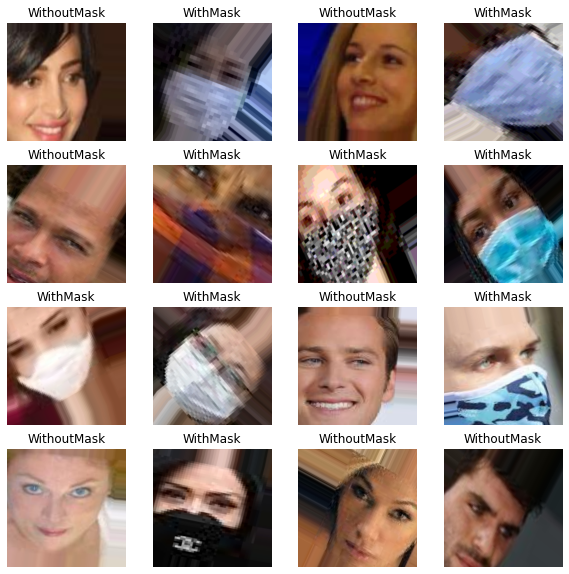

In [9]:
# displaying images in image data generator with label

import matplotlib.pyplot as plt
import numpy as np

image_batch, label_batch = next(iter(train_generator))
fix, axes = plt.subplots(4,4, figsize=(10,10))
axes = axes.flatten()
for img,lbl, ax in zip(image_batch, label_batch, axes):
    ax.imshow(img)
    label = idx_labels[lbl]
    ax.set_title(label)
    ax.axis('off')
plt.show()

### Train The Model

In [10]:
# load the pretrained Inception_v3 model with imagenet weights

from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),
    include_top=False, weights='imagenet'
)

In [13]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [13]:
for layer in pre_trained_model.layers:  # lock the upper layers
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [14]:
x = layers.Flatten()(last_output) #flatten the output
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x) # adding dropout for regularization              
x = layers.Dense(2, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

In [15]:
# compile the model

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [16]:
steps_per_epoch = train_generator.samples//train_generator.batch_size
validation_steps = validation_generator.samples //validation_generator.batch_size

# checking for earlystopping
checkpoint_cb= keras.callbacks.ModelCheckpoint("facemask_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [17]:
# train the model

history = model.fit(train_generator,
                    epochs=300,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/300
125/125 [==============================] - 58s 398ms/step - loss: 0.1313 - accuracy: 0.9505 - val_loss: 0.0393 - val_accuracy: 0.9844
Epoch 2/300
125/125 [==============================] - 31s 245ms/step - loss: 0.0477 - accuracy: 0.9885 - val_loss: 0.0761 - val_accuracy: 0.9792
Epoch 3/300
125/125 [==============================] - 31s 249ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0530 - val_accuracy: 0.9896
Epoch 4/300
125/125 [==============================] - 33s 262ms/step - loss: 0.0291 - accuracy: 0.9925 - val_loss: 5.8005e-04 - val_accuracy: 1.0000
Epoch 5/300
125/125 [==============================] - 36s 289ms/step - loss: 0.0326 - accuracy: 0.9930 - val_loss: 0.0209 - val_accuracy: 0.9948
Epoch 6/300
125/125 [==============================] - 32s 257ms/step - loss: 0.0346 - accuracy: 0.9930 - val_loss: 0.0492 - val_accuracy: 0.9792
Epoch 7/300
125/125 [==============================] - 32s 255ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.00

In [18]:
# evaluate the model

model.evaluate(test_generator)

13/13 [==============================] - 2s 160ms/step - loss: 6.8025e-06 - accuracy: 1.0000


[6.8025383370695636e-06, 1.0]

### Plot for Model Accuracy and Loss

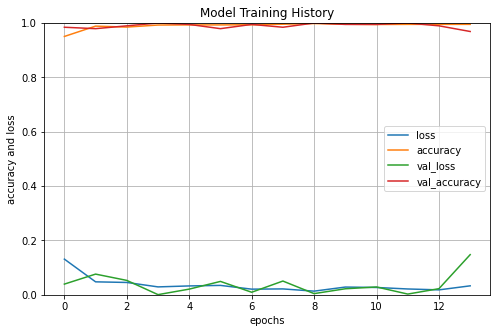

In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Training History")
plt.xlabel("epochs")
plt.ylabel("accuracy and loss")
plt.show()

In [20]:
# reload the saved model

model = keras.models.load_model("facemask_keras_model.h5")

In [21]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'WithMask': 0, 'WithoutMask': 1}
{'WithMask': 0, 'WithoutMask': 1}


### Testing the model with unseen data

(1, 224, 224, 3)


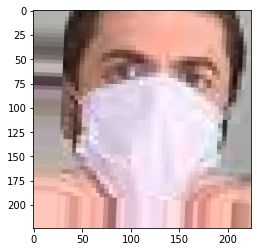

In [22]:
# plot the test image

from keras.preprocessing import image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image_path="Face-Mask-Dataset\\Test\\WithMask\\Augmented_672_5034927.png"
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)

mask_img = np.expand_dims(img, axis=0)
mask = tf.keras.applications.inception_v3.preprocess_input(mask_img,data_format='channels_last')
print(mask.shape)

In [23]:
# predict the label 

predictions = model.predict(mask, verbose=1)
print(np.argmax(predictions))

1/1 [==============================] - 2s 2s/step
0


(1, 224, 224, 3)


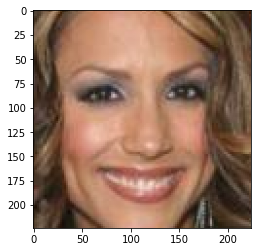

In [24]:
image_path="Face-Mask-Dataset\\Test\WithoutMask\\5715.png"
withoutmask_img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(withoutmask_img)

withoutmask_img = np.expand_dims(withoutmask_img, axis=0)
without_mask = tf.keras.applications.inception_v3.preprocess_input(withoutmask_img,data_format='channels_last')
print(without_mask.shape)

In [25]:
# predict the label 

predictions = model.predict(without_mask, verbose=1)
print(np.argmax(predictions))

1/1 [==============================] - 0s 35ms/step
1
